DenseNet, LeNet, Xception and GoogleNet models performed on
Drishti Dataset

#Importing Packages

In [ ]:
#Importing packages
import os
import random
import numpy as np
import seaborn as sns
from PIL import Image
from keras.models import Model
import matplotlib.pyplot as plt
from keras.models import Sequential
from imblearn.over_sampling import SMOTE
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from keras.applications.xception import Xception
from keras.applications.densenet import DenseNet121
from sklearn.model_selection import train_test_split
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from sklearn.metrics import precision_score, recall_score, f1_score
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Loading Images

In [ ]:
  # Set the dimensions of the input images
img_width, img_height = 224, 224
# Set the number of classes
num_classes = 2
# Set the path to the directory containing the images
data_path = "/content/drive/MyDrive/Origa"
# Load the image data and labels
X = []
y = []
for label, folder_name in enumerate(["no", "yes"]):
    folder_path = os.path.join(data_path, folder_name)
    for filename in os.listdir(folder_path):
        image = Image.open(os.path.join(folder_path, filename))
        image = image.resize((img_width, img_height))
        image = np.array(image)
        X.append(image)
        y.append(label)
# Set a fixed random seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)

#Image PreProcessing

In [ ]:
# Convert the image data and labels to NumPy arrays
X = np.array(X)
y = np.array(y)
# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X.reshape(X.shape[0], -1), y)
# Reshape X back to 3D format
X = X.reshape(X.shape[0], img_width, img_height, 3)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalize the image data to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
# Convert the labels to one-hot encoding
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

#Creating Models

In [ ]:
# Create the DenseNet121 model
base_dense_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(img_width, img_height, 3))
# Create the Xception model
base_xception_model = Xception(include_top=False, weights='imagenet', input_shape=(img_width, img_height, 3))
# Load the InceptionV3 model without the top classification layer
base_inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))


87910968/87910968 [==============================] - 1s 0us/step


#Adding custom classification layers.

In [ ]:
# Add custom classification layers on top of the base dense model
dense_model = Sequential()
dense_model.add(base_dense_model)
dense_model.add(Flatten())
dense_model.add(Dense(256, activation='relu'))
dense_model.add(Dense(num_classes, activation='softmax'))
# Add custom classification layers on top of the base inception model
inception_model = Sequential()
inception_model.add(base_inception_model)
inception_model.add(Flatten())
inception_model.add(Dense(256, activation='relu'))
inception_model.add(Dense(num_classes, activation='softmax'))
# Add custom classification layers on top of the Xception base model
xception_model = Sequential()
xception_model.add(base_xception_model)
xception_model.add(Flatten())
xception_model.add(Dense(256, activation='relu'))
xception_model.add(Dense(num_classes, activation='softmax'))
# Create the LeNet-5 model
lenet_model = Sequential()
lenet_model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(img_width, img_height, 3)))
lenet_model.add(AveragePooling2D(pool_size=(2, 2)))
lenet_model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
lenet_model.add(AveragePooling2D(pool_size=(2, 2)))
lenet_model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
lenet_model.add(AveragePooling2D(pool_size=(2, 2)))
lenet_model.add(Flatten())
lenet_model.add(Dense(120, activation='relu'))
lenet_model.add(Dense(84, activation='relu'))
lenet_model.add(Dense(num_classes, activation='softmax'))



#Compiling the model

In [ ]:
# Compile the dense model
dense_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Compile the xception model
xception_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Compile the lenet model
lenet_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Compile the inception model
inception_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Training the model

In [ ]:
# Train the DenseNet model
dense_model.fit(
    datagen.flow(X_train, y_train, batch_size=32, seed=seed),
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/10
24/24 [==============================] - 111s 827ms/step - loss: 4.1540 - accuracy: 0.7848 - val_loss: 865.0516 - val_accuracy: 0.5544
Epoch 2/10
24/24 [==============================] - 13s 522ms/step - loss: 0.4316 - accuracy: 0.8336 - val_loss: 2931.1995 - val_accuracy: 0.5544
Epoch 3/10
24/24 [==============================] - 13s 534ms/step - loss: 0.5883 - accuracy: 0.8092 - val_loss: 834.9409 - val_accuracy: 0.5181
Epoch 4/10
24/24 [==============================] - 13s 544ms/step - loss: 0.5217 - accuracy: 0.7456 - val_loss: 1.0639 - val_accuracy: 0.7772
Epoch 5/10
24/24 [==============================] - 13s 519ms/step - loss: 0.5621 - accuracy: 0.7659 - val_loss: 5.9336 - val_accuracy: 0.7047
Epoch 6/10
24/24 [==============================] - 12s 479ms/step - loss: 0.5613 - accuracy: 0.7497 - val_loss: 1.1202 - val_accuracy: 0.5440
Epoch 7/10
24/24 [==============================] - 13s 530ms/step - loss: 0.4123 - accuracy: 0.8038 - val_loss: 0.5468 - val_accuracy

In [ ]:
# Train the xception model
xception_model.fit(
    datagen.flow(X_train, y_train, batch_size=32, seed=seed),
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/10
24/24 [==============================] - 53s 665ms/step - loss: 1.4599 - accuracy: 0.6276 - val_loss: 0.4967 - val_accuracy: 0.6373
Epoch 2/10
24/24 [==============================] - 16s 653ms/step - loss: 0.4303 - accuracy: 0.8119 - val_loss: 1.0792 - val_accuracy: 0.6218
Epoch 3/10
24/24 [==============================] - 14s 584ms/step - loss: 0.4299 - accuracy: 0.8038 - val_loss: 0.9271 - val_accuracy: 0.5544
Epoch 4/10
24/24 [==============================] - 15s 617ms/step - loss: 0.3703 - accuracy: 0.8133 - val_loss: 1.7693 - val_accuracy: 0.5544
Epoch 4: early stopping


In [ ]:
# Fit the model with data augmentation
lenet_model.fit(
    datagen.flow(X_train, y_train, batch_size=32, seed=seed),
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/10
24/24 [==============================] - 13s 396ms/step - loss: 0.5789 - accuracy: 0.6820 - val_loss: 0.4950 - val_accuracy: 0.7565
Epoch 2/10
24/24 [==============================] - 8s 320ms/step - loss: 0.4290 - accuracy: 0.8086 - val_loss: 0.4284 - val_accuracy: 0.7876
Epoch 3/10
24/24 [==============================] - 9s 382ms/step - loss: 0.3985 - accuracy: 0.8241 - val_loss: 0.4136 - val_accuracy: 0.7927
Epoch 4/10
24/24 [==============================] - 9s 364ms/step - loss: 0.4030 - accuracy: 0.8187 - val_loss: 0.4170 - val_accuracy: 0.7876
Epoch 5/10
24/24 [==============================] - 7s 308ms/step - loss: 0.4045 - accuracy: 0.8241 - val_loss: 0.4422 - val_accuracy: 0.7927
Epoch 6/10
24/24 [==============================] - 9s 373ms/step - loss: 0.3968 - accuracy: 0.8241 - val_loss: 0.4274 - val_accuracy: 0.7772
Epoch 6: early stopping


In [ ]:
# Train the GoogleNet model
inception_model.fit(
    datagen.flow(X_train, y_train, batch_size=32, seed=seed),
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/10
24/24 [==============================] - 12s 505ms/step - loss: 0.3251 - accuracy: 0.8376 - val_loss: 1.1723 - val_accuracy: 0.7927
Epoch 2/10
24/24 [==============================] - 11s 456ms/step - loss: 0.3279 - accuracy: 0.8430 - val_loss: 0.5978 - val_accuracy: 0.7876
Epoch 3/10
24/24 [==============================] - 11s 464ms/step - loss: 0.8016 - accuracy: 0.8187 - val_loss: 1762.5090 - val_accuracy: 0.5544
Epoch 4/10
24/24 [==============================] - 11s 475ms/step - loss: 0.7960 - accuracy: 0.6644 - val_loss: 626548.4375 - val_accuracy: 0.5181
Epoch 5/10
24/24 [==============================] - 10s 422ms/step - loss: 0.7884 - accuracy: 0.7172 - val_loss: 57335316.0000 - val_accuracy: 0.5544
Epoch 5: early stopping


#Performance Evaluation Metrics

In [ ]:
# Evaluate the model on the test data
loss, accuracy = xception_model.evaluate(X_test, y_test)
print(f"Test Loss of xception: {loss:.4f}")
print(f"Test Accuracy of xception: {accuracy:.4f}")
# Evaluate the model on the test data
loss, accuracy = dense_model.evaluate(X_test, y_test)
print(f"Test Loss of densenet: {loss:.4f}")
print(f"Test Accuracy of densenet: {accuracy:.4f}")
# Evaluate the model on the test data
loss, accuracy = inception_model.evaluate(X_test, y_test)
print(f"Test Loss of inception: {loss:.4f}")
print(f"Test Accuracy of inception: {accuracy:.4f}")
# Evaluate the model on the test data
loss, accuracy = lenet_model.evaluate(X_test, y_test)
print(f"Test Loss of lenet_model: {loss:.4f}")
print(f"Test Accuracy of lenet_model: {accuracy:.4f}")

7/7 [==============================] - 1s 119ms/step - loss: 0.4967 - accuracy: 0.6373
Test Loss of xception: 0.4967
Test Accuracy of xception: 0.6373
7/7 [==============================] - 1s 78ms/step - loss: 0.4050 - accuracy: 0.7979
Test Loss of densenet: 0.4050
Test Accuracy of densenet: 0.7979
7/7 [==============================] - 0s 60ms/step - loss: 0.5978 - accuracy: 0.7876
Test Loss of inception: 0.5978
Test Accuracy of inception: 0.7876
7/7 [==============================] - 0s 13ms/step - loss: 0.4136 - accuracy: 0.7927
Test Loss of lenet_model: 0.4136
Test Accuracy of lenet_model: 0.7927


In [ ]:
# 1. Evaluate the dense model on the test data
y_pred_dense = dense_model.predict(X_test)
y_pred_dense_classes = np.argmax(y_pred_dense, axis=1)
y_true_dense = np.argmax(y_test, axis=1)
# Calculate precision, recall, and F1 score for dense
precision_dense = precision_score(y_true_dense, y_pred_dense_classes)
recall_dense = recall_score(y_true_dense, y_pred_dense_classes)
f1_dense = f1_score(y_true_dense, y_pred_dense_classes)
# 2. Evaluate the Inception model on the test data
y_pred_inception = inception_model.predict(X_test)
y_pred_inception_classes = np.argmax(y_pred_inception, axis=1)
y_true_inception = np.argmax(y_test, axis=1)
# Calculate precision, recall, and F1 score for Inception
precision_inception = precision_score(y_true_inception, y_pred_inception_classes)
recall_inception = recall_score(y_true_inception, y_pred_inception_classes)
f1_inception = f1_score(y_true_inception, y_pred_inception_classes)
# 3. Evaluate the Xception model on the test data
y_pred_xception = xception_model.predict(X_test)
y_pred_xception_classes = np.argmax(y_pred_xception, axis=1)
y_true_xception = np.argmax(y_test, axis=1)
# Calculate precision, recall, and F1 score for Xception
precision_xception = precision_score(y_true_xception, y_pred_xception_classes)
recall_xception = recall_score(y_true_xception, y_pred_xception_classes)
f1_xception = f1_score(y_true_xception, y_pred_xception_classes)
# 4. Evaluate the LeNet model on the test data
y_pred_lenet = lenet_model.predict(X_test)
y_pred_lenet_classes = np.argmax(y_pred_lenet, axis=1)
y_true_lenet = np.argmax(y_test, axis=1)
# Calculate precision, recall, and F1 score for LeNet
precision_lenet = precision_score(y_true_lenet, y_pred_lenet_classes)
recall_lenet = recall_score(y_true_lenet, y_pred_lenet_classes)
f1_lenet = f1_score(y_true_lenet, y_pred_lenet_classes)

7/7 [==============================] - 0s 10ms/step


In [ ]:
#Precision, Recall, F1 Score of DenseNet Model
print(f"precision of dense: {precision_dense:.4f}")
print(f"recall dense: {recall_dense:.4f}")
print(f"F1 Score of dense: {f1_dense:.4f}")
#Precision, Recall, F1 Score of Xception Model
print(f"Precision of xception: {precision_xception:.4f}")
print(f"Recall of xception: {recall_xception:.4f}")
print(f"F1 Score of xception: {f1_xception:.4f}")
#Precision, Recall, F1 Score of LeNet Model
print(f"Precision of Lenet: {precision_lenet:.4f}")
print(f"Recall of Lenet: {recall_lenet:.4f}")
print(f"F1 Score of Lenet: {f1_lenet:.4f}")
#Precision, Recall, F1 Score of Inception Model
print(f"Precision of Inception: {precision_inception:.4f}")
print(f"Recall of Inception: {recall_inception:.4f}")
print(f"F1 Score of Inception: {f1_inception:.4f}")

precision of dense: 0.9474
recall dense: 0.6729
F1 Score of dense: 0.7869
Precision of xception: 0.6194
Recall of xception: 0.8972
F1 Score of xception: 0.7328
Precision of Lenet: 1.0000
Recall of Lenet: 0.6262
F1 Score of Lenet: 0.7701
Precision of Inception: 0.9853
Recall of Inception: 0.6262
F1 Score of Inception: 0.7657


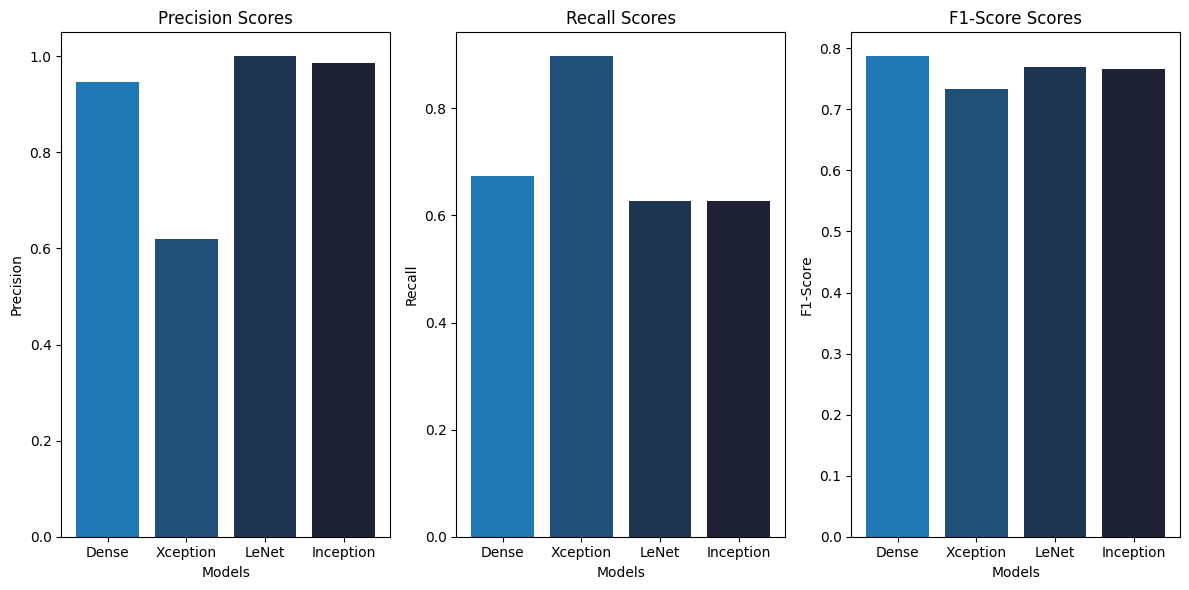

In [ ]:
# Precision, Recall, and F1-score values for each model
models = ['Dense', 'Xception', 'LeNet', 'Inception']
precision_values = [precision_dense, precision_xception, precision_lenet, precision_inception]
recall_values = [recall_dense, recall_xception, recall_lenet, recall_inception]
f1_values = [f1_dense, f1_xception, f1_lenet, f1_inception]
# Define different shades of blue for each model
colors = ['#1f77b4', '#1f4e77', '#1f3552', '#1f2235']
# Initialize plots
plt.figure(figsize=(12, 6))
# Plot Precision scores
plt.subplot(1, 3, 1)
plt.bar(models, precision_values, color=colors)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Scores')
# Plot Recall scores
plt.subplot(1, 3, 2)
plt.bar(models, recall_values, color=colors)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Scores')
# Plot F1 scores
plt.subplot(1, 3, 3)
plt.bar(models, f1_values, color=colors)
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('F1-Score Scores')
plt.tight_layout()
plt.show()

In [ ]:
# Obtain the predicted probabilities for the positive class of DenseNet model
y_pred_prob_dense = dense_model.predict(X_test)[:, 1]
# Obtain the predicted probabilities for the positive class of Xception Model
y_pred_prob_xception = xception_model.predict(X_test)[:, 1]
# Obtain the predicted probabilities for the positive class of LeNet model
y_pred_prob_lenet = lenet_model.predict(X_test)[:, 1]
# Obtain the predicted probabilities for the positive class of Inception Model
y_pred_prob_inception = inception_model.predict(X_test)[:, 1]

7/7 [==============================] - 0s 60ms/step


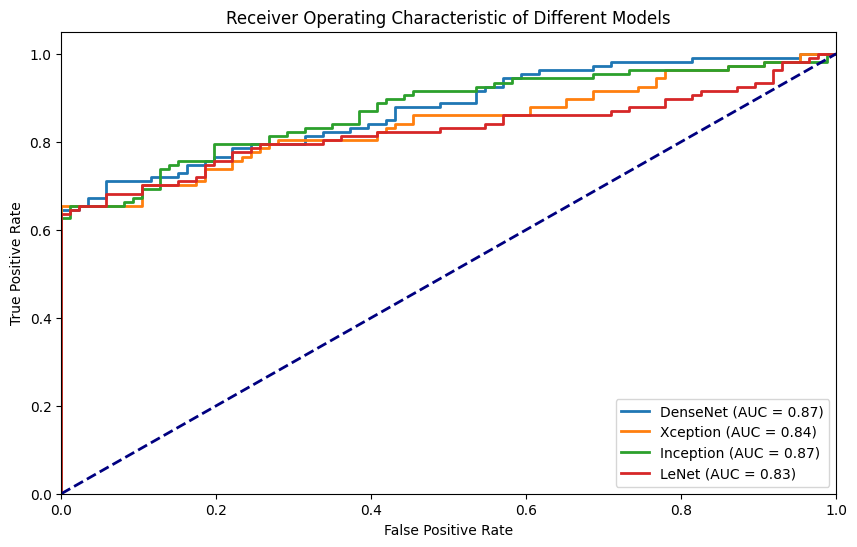

In [ ]:

# Data for all models
models = ['DenseNet', 'Xception', 'Inception', 'LeNet']
fprs = [fpr_dense, fpr_xception, fpr_inception, fpr_lenet]
tprs = [tpr_dense, tpr_xception, tpr_inception, tpr_lenet]
auc_scores = [auc(fpr, tpr) for fpr, tpr in zip(fprs, tprs)]
# Plotting ROC curves for all models
plt.figure(figsize=(10, 6))
for model, fpr, tpr, auc_score in zip(models, fprs, tprs, auc_scores):
    plt.plot(fpr, tpr, lw=2, label=f'{model} (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Different Models')
plt.legend(loc="lower right")
plt.show()

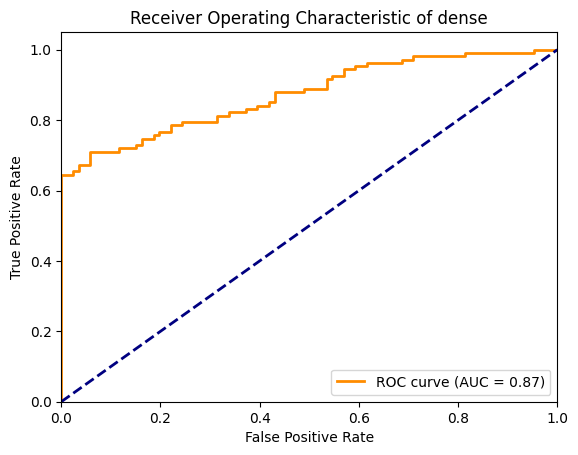

In [ ]:
# Compute the false positive rate, true positive rate, and classification threshold of dense
fpr_dense, tpr_dense, thresholds_dense = roc_curve(y_true_dense, y_pred_prob_dense)
# Compute the AUC score
roc_auc = auc(fpr_dense, tpr_dense)
# Plot the ROC curve
plt.figure()
plt.plot(fpr_dense, tpr_dense, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of dense')
plt.legend(loc="lower right")
plt.show()

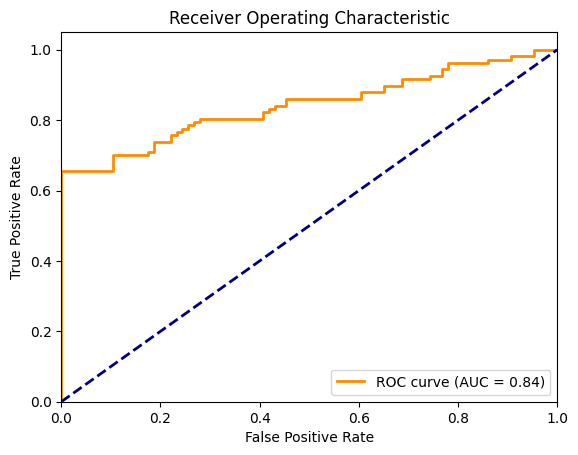

In [ ]:
# Compute the false positive rate, true positive rate, and classification threshold
fpr_xception, tpr_xception, thresholds_xception = roc_curve(y_true_xception, y_pred_prob_xception)
# Compute the AUC score
roc_auc = auc(fpr_xception, tpr_xception)
# Plot the ROC curve
plt.figure()
plt.plot(fpr_xception, tpr_xception, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

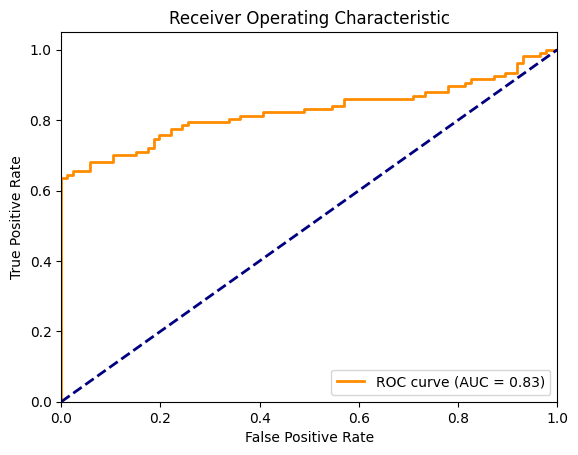

In [ ]:
# Compute the false positive rate, true positive rate, and classification threshold
fpr_lenet, tpr_lenet, thresholds_lenet = roc_curve(y_true_lenet, y_pred_prob_lenet)
# Compute the AUC score
roc_auc = auc(fpr_lenet, tpr_lenet)
# Plot the ROC curve
plt.figure()
plt.plot(fpr_lenet, tpr_lenet, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

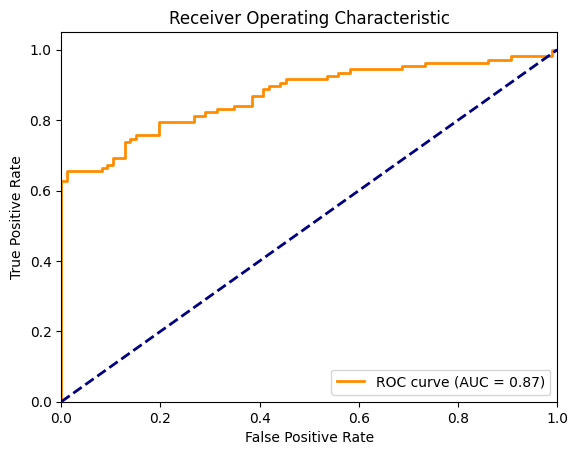

In [ ]:
# Compute the false positive rate, true positive rate, and classification threshold
fpr_inception, tpr_inception, thresholds_inception = roc_curve(y_true_inception, y_pred_prob_inception)
# Compute the AUC score
roc_auc = auc(fpr_inception, tpr_inception)
# Plot the ROC curve
plt.figure()
plt.plot(fpr_inception, tpr_inception, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Define the class labels
class_names = ['No', 'Yes']

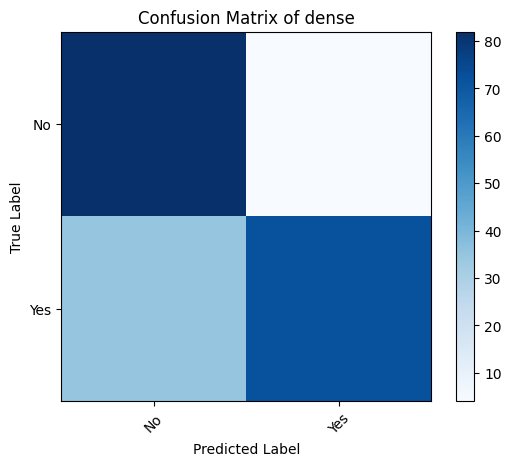

In [ ]:
# Obtain the predicted classes
y_pred_classes_dense = np.argmax(y_pred_dense, axis=1)
y_true_classes_dense = np.argmax(y_test, axis=1)
# Compute the confusion matrix
cm = confusion_matrix(y_true_classes_dense, y_pred_classes_dense)
# Create a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
# Plot the confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names)
plt.title('Confusion Matrix of dense')
plt.show()

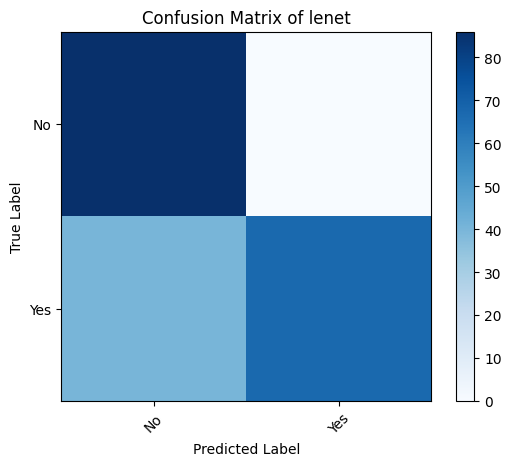

In [ ]:
# Obtain the predicted classes
y_pred_classes_lenet = np.argmax(y_pred_lenet, axis=1)
y_true_classes_lenet = np.argmax(y_test, axis=1)
# Compute the confusion matrix
cm = confusion_matrix(y_true_classes_lenet, y_pred_classes_lenet)
# Create a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
# Plot the confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names)
plt.title('Confusion Matrix of lenet')
plt.show()

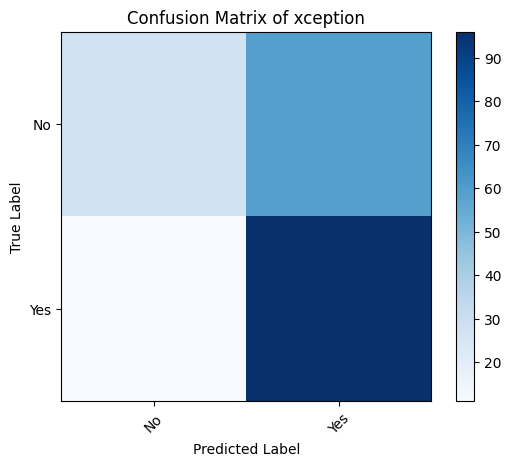

In [ ]:
# Obtain the predicted classes
y_pred_classes_xception = np.argmax(y_pred_xception, axis=1)
y_true_classes_xception = np.argmax(y_test, axis=1)
# Compute the confusion matrix
cm = confusion_matrix(y_true_classes_xception, y_pred_classes_xception)
# Create a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
# Plot the confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names)
plt.title('Confusion Matrix of xception')
plt.show()

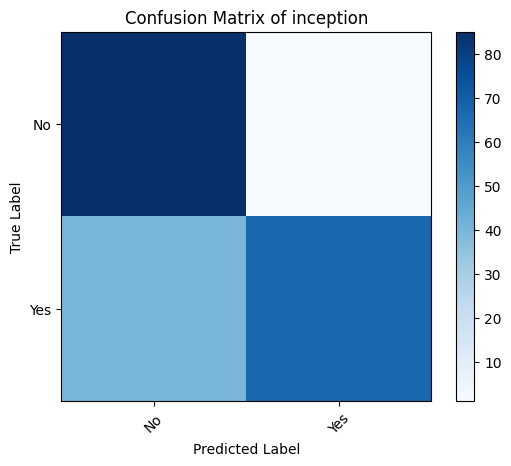

In [ ]:
# Obtain the predicted classes
y_pred_classes_inception = np.argmax(y_pred_inception, axis=1)
y_true_classes_inception = np.argmax(y_test, axis=1)
# Compute the confusion matrix
cm = confusion_matrix(y_true_classes_inception, y_pred_classes_inception)
# Create a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
# Plot the confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names)
plt.title('Confusion Matrix of inception')
plt.show()

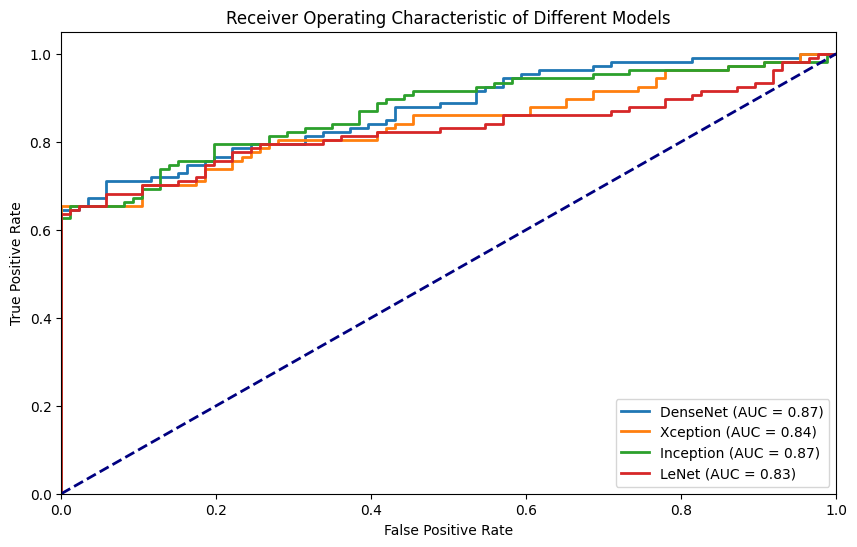

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Data for all models
models = ['DenseNet', 'Xception', 'Inception', 'LeNet']
fprs = [fpr_dense, fpr_xception, fpr_inception, fpr_lenet]
tprs = [tpr_dense, tpr_xception, tpr_inception, tpr_lenet]
auc_scores = [auc(fpr, tpr) for fpr, tpr in zip(fprs, tprs)]

# Plotting ROC curves for all models
plt.figure(figsize=(10, 6))
for model, fpr, tpr, auc_score in zip(models, fprs, tprs, auc_scores):
    plt.plot(fpr, tpr, lw=2, label=f'{model} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Different Models')
plt.legend(loc="lower right")
plt.show()

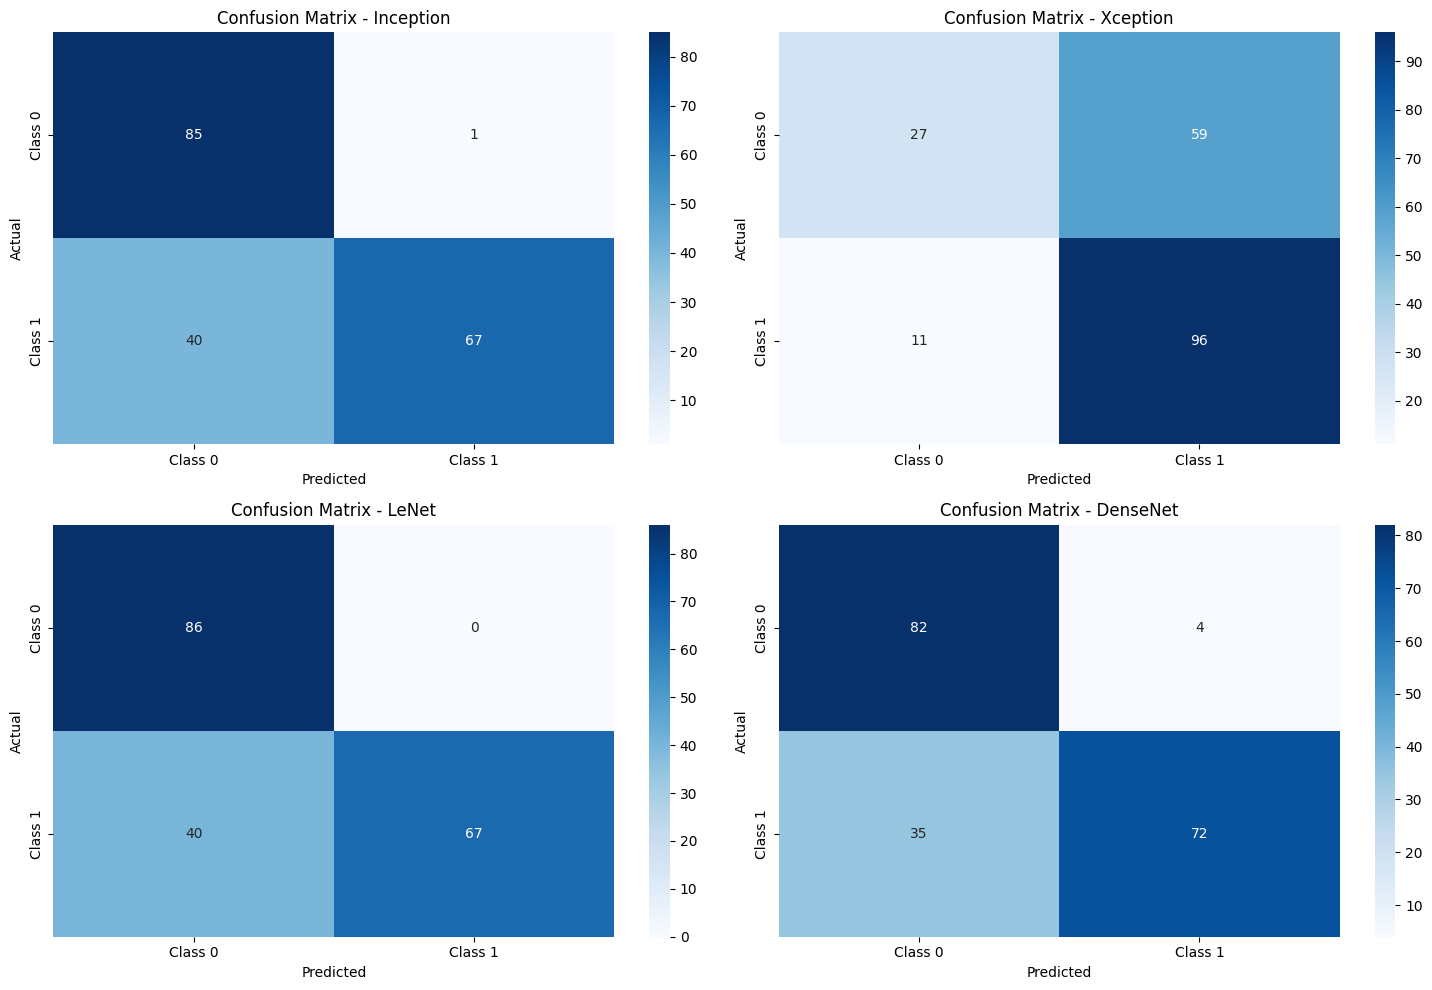

In [ ]:
cm_xception = confusion_matrix(y_true_classes_xception, y_pred_classes_xception)
cm_inception = confusion_matrix(y_true_classes_inception, y_pred_classes_inception)
cm_lenet = confusion_matrix(y_true_classes_lenet, y_pred_classes_lenet)
cm_dense = confusion_matrix(y_true_classes_dense, y_pred_classes_dense)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# List of model names
model_names = ['Inception', 'Xception', 'LeNet', 'DenseNet']

# List of confusion matrices for each model
conf_matrices = [
    cm_inception,
    cm_xception,
    cm_lenet,
    cm_dense
]

# Plot confusion matrices
plt.figure(figsize=(15, 10))
for i, (model_name, conf_matrix) in enumerate(zip(model_names, conf_matrices), start=1):
    plt.subplot(2, 2, i)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()
